In [19]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp,wilcoxon
import pickle
import random
import math

In [13]:
address_main = '/Users/vu/surfdrive/PostDoc/VUMC projrct/Related Matterials/Positive and unlabeled dataset/Code/Expected Value, and Variance/'


address_Fig_saving = address_main +'AVG, STD, Generated.png'

In [14]:
size_data = 200
number_of_lines = 1

df_data = pd.DataFrame(columns=['x','y','real_label','visible_label','prediction'])

In [15]:
df_data['x'] = np.random.rand(size_data)
df_data['y'] = np.random.rand(size_data)
df_data['real_label'] = np.zeros(size_data)
df_data['visible_label'] = np.zeros(size_data)

In [16]:
for i in range(0,size_data):
    x = df_data.loc[i,'x']
    y = df_data.loc[i,'y']
    #if (3*x ** 3 - 0.5 *x  + 0.2) < ( 0 *y **2 + 1 * y + 0): 
    #if ((x-0.5)**2 + 0.3 > y) :
    if (x  + 0.2) < ( y ): 
        df_data.loc[i,'real_label'] = +1

In [17]:
df_data.head(2)

,x,y,real_label,visible_label,prediction
0,0.803508,0.381074,0.0,0.0,NaN
1,0.056900,0.529895,1.0,0.0,NaN


In [209]:
#[[x1,y1]] = np.random.rand(1,2)
#r = random.random()*math.pi*2
#w = math.sin(r)/math.cos(r)
#b = y1 - w*x1
[w,b] = [-6.492682592689922, 1.8498004876304779]
print([w,b])

[-6.492682592689922, 1.8498004876304779]


In [210]:
df_data['prediction'] = ((w * df_data['x'] +b - df_data['y'] )>0)*1
d = np.sum(df_data['prediction']==+1)
df_data.head(5)

,x,y,real_label,visible_label,prediction
0,0.803508,0.381074,0.0,0,0
1,0.056900,0.529895,1.0,1,1
2,0.930937,0.554816,0.0,0,0
3,0.461676,0.628538,0.0,0,0
4,0.736796,0.379693,0.0,0,0


In [211]:
N_visibles =   range(1,int(np.sum(df_data['real_label'])))
max_counter_ws = 1
max_counter_cs = 100

In [212]:
dic_F1_={}
dic_var = {}
for N_visible in N_visibles:
    rho_real = N_visible / np.sum(df_data['real_label'] == +1)
    dic_F1_[rho_real]=[]
    
    for counter_rho in range(0,max_counter_cs):
        ## Set visibile data points
        
        df_data['visible_label'] = 0
        temp_visibles = np.random.choice(np.where(df_data['real_label']==+1)[0], size=N_visible, replace=False)
        df_data.loc[temp_visibles,'visible_label'] = +1
        # calculate estimated F1    
        dic_F1_[rho_real].append(F1_estimate(df_data,rho_real))
    ## calculated Variance
    c = N_visible
    b = np.sum((df_data['prediction']==+1) & (df_data['real_label']==+1))
    a = np.sum(df_data['real_label']==+1)
    #x = np.sum((df_data['prediction']==+1) & (df_data['visible_label']==+1))
    var = b*c*(a-c)*(a-b)/(a**2 * (a-1))
    VAR = (2/ (rho_real*d + c ))**2 * var
    dic_var[rho_real] = VAR

/Users/vu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [213]:
mean = b*c/a
F1 = 2*mean/(rho_real*d+c)
F1

0.411214953271028

## Make Figure

In [223]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

In [224]:
for N_visible in N_visibles:
    rho_real = N_visible / np.sum(df_data['real_label'] == +1)
    plt.scatter(np.ones(max_counter_cs)*rho_real, dic_F1_[rho_real],alpha=0.15,c='k',s=8,marker='o')
    
        # real Mean
    plt.scatter(x = rho_real, y = np.mean(dic_F1_[rho_real]), c='b',marker='_',label= None)
        # real standard deviations
    plt.scatter(x = rho_real, y = np.mean(dic_F1_[rho_real])+ np.std(dic_F1_[rho_real]) , c='r',marker='_', label =None)
    plt.scatter(x = rho_real, y = np.mean(dic_F1_[rho_real])- np.std(dic_F1_[rho_real]) , c='r',marker='_',label=None)

        # Just for lgends
plt.scatter(np.ones(max_counter_cs)*rho_real, dic_F1_[rho_real],alpha=0.15,c='k',s=5,marker='o', label = r'$\overline{F1}$')
plt.scatter(x = rho_real, y = np.mean(dic_F1_[rho_real]), c='b',marker='_',label=r'mean($\overline{F1}$)' )
        # real standard deviations
plt.scatter(x = rho_real, y = np.mean(dic_F1_[rho_real])+ np.std(dic_F1_[rho_real]) , c='r',marker='_',label=r'$\overline{F1}$ +- std($\overline{F1}$)' )




In [225]:
    
# calculated mean
plt.plot(dic_var.keys(), list(F1* np.ones(len(dic_var))) , c= 'b', linestyle=':',label= 'E(F1)')
# calculated standard deviations
plt.plot(dic_var.keys(), F1 + np.sqrt(list(dic_var.values())), c = 'r' , linestyle=':', label = 'E(F1) +- std(F1)' )
plt.plot(dic_var.keys(), F1 - np.sqrt(list(dic_var.values())), c = 'r', linestyle=':',label=None )

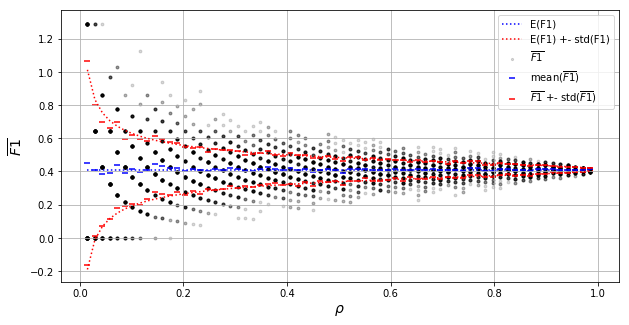

In [226]:
plt.xlabel(r"$\rho$", fontsize = 14)
plt.ylabel(r"$\overline{F1}$", fontsize = 14)
plt.grid(axis='both')
plt.legend()
#plt.ylim([-0.3,1.6])

plt.savefig(address_main +'AVG, STD, GeneratedDataset.png')

plt.show()

# FUNCTIONS

In [145]:
# Linear Function

def g(W,X):
    
    return np.dot(X,w[0,0:-1]) + w[0,-1]

In [146]:
def predicted_labels (df,W):
    N_features = W.shape[1] -1
    for i in range (0 , len(df)):
        Xi = df.iloc[i,0:N_features]
        g_xi = g(W, Xi)
        if g_xi > 0 :
            df.loc[i,'prediction'] = +1
        else:
            df.loc[i,'prediction'] = -1
    return(df['prediction'])

In [147]:
# calculate scores 
def F1_scores(df, writing = False):
    TP = np.sum((df['prediction'] == +1) &  (df ['real_label'] == +1))
    FP = np.sum((df['prediction'] == +1) &  (df ['real_label'] == 0))
    FN = np.sum((df['prediction'] == 0) &  (df ['real_label'] == +1))
    if writing :
        print( 'TP, FP, FN = ', TP, FP, FN)

    pr = TP/(TP+FP)
    re = TP/(TP+FN)
    F_score = 2*pr*re/(pr+re)

    
    return (F_score )

In [148]:
# calculate scores 
def F1_estimate(df,rho, writing = False):
    
    TP_ = np.sum((df['prediction'] == +1) &  (df ['visible_label'] == +1))
    FP_ = np.sum((df['prediction'] == +1) &  (df ['visible_label'] == 0))
    FN_ = np.sum((df['prediction'] == 0) &  (df ['visible_label'] == +1))
    if writing :
        print( 'TP_, FP_, FN_ = ', TP_, FP_, FN_)
    pr_ = TP_/(TP_ + FP_)
    pr_ /= rho
    re_ = TP_/(TP_ + FN_)
    F_score_ = 2*pr_*re_/(pr_+re_)

    if writing:
        print('np.sum((df[prediction] == +1)) = ', np.sum((df['prediction'] == +1)))
    

    if np.isnan(F_score_):
        F_score_=0

    return ( F_score_)

In [152]:

def viz(df_data,address=''):
    size_data = len(df_data)
    c=[]
    alpha= []
    S= 80
    for i in range(0,size_data):
        if df_data.loc[i,'real_label'] == 0 :
            c.append('b')
        else:
            c.append('r')    

        if df_data.loc[i,'visible_label'] == 0 :
            alpha.append(1)
        else:
            alpha.append(8)


    plt.scatter(df_data['x'],df_data['y'], alpha=0.5,linewidths=alpha,edgecolors = 'k', c=c,s=S)
    plt.xlim([0,1])
    plt.ylim([0,1])
    if (address!='') :
        print('saved')
        plt.savefig(address)
    plt.show()





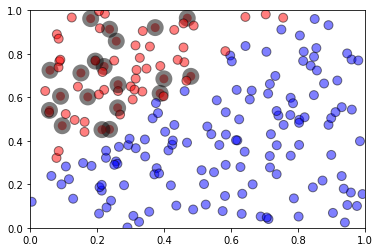

In [153]:
viz(df_data)

In [154]:

df_data.head(20)

,x,y,real_label,visible_label,prediction
0,0.803508,0.381074,0.0,0,0
1,0.056900,0.529895,1.0,0,1
2,0.930937,0.554816,0.0,0,0
3,0.461676,0.628538,0.0,0,1
4,0.736796,0.379693,0.0,0,0
5,0.802097,0.051653,0.0,0,1
6,0.661980,0.630887,0.0,0,0
7,0.778342,0.597911,0.0,0,0
8,0.750602,0.911730,0.0,0,0
9,0.757368,0.473188,0.0,0,0


In [160]:
[[x1,y1]] = np.random.rand(1,2)
r = random.random()*math.pi*2
w = math.sin(r)/math.cos(r)
b = y1 - w*x1
print([w,b])

[-6.492682592689922, 1.8498004876304779]


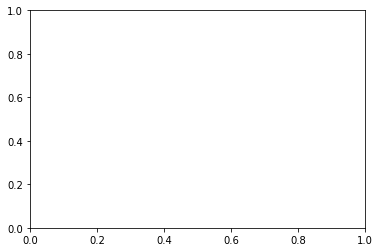

In [208]:

plt.plot([-10,10], [-10*w+b,10*w+b],c='k',alpha=0.4)
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

[0.6534173671217618, -0.36121763684334757]
